![alt text](https://zewailcity.edu.eg/main/images/logo3.png)
# Math 404 report 1
### Ezzat Esam Eisawy  201901195

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Callable
from IPython.utils.io import capture_output
from scipy.optimize import minimize

# Fibonaci and Golden Ratio elemination methods

In [ ]:
def solve_elimination_1D(
    func: Callable[[float], float],
    lower: float,
    upper: float,
    minimize: bool = True,
    method: str = "golden",
    accuracy: float = 0.1,
    visualize: bool = True,
):
    """
    Solves a 1-dimensional optimization problem using the elimination method.

    Parameters:
    - func (Callable[[float], float]): The objective function to be minimized or maximized.
    - lower (float): The lower bound of the search space.
    - upper (float): The upper bound of the search space.
    - minimize (bool, optional): If True, the goal is to minimize the objective function; otherwise, to maximize. Default is True.
    - method (str, optional): The method to use for optimization. Options include "golden" for the golden section method and "fib" for Fibonacci method. Default is "golden".
    - accuracy (float, optional): The desired accuracy of the solution. Default is 0.1.
    - visualize (bool, optional): If True, the optimization process is visualized and a table of iterations is displayed. Default is True.

    Returns:
    - float: The optimal value of x within the specified bounds.
    """
    x_lower = lower
    x_upper = upper

    f_x_upper = func(x_upper)
    f_x_lower = func(x_lower)

    if visualize:
        history = pd.DataFrame(
            columns=[
                "x_lower",
                "f(x_lower)",
                "x2",
                "f(x2)",
                "x1",
                "f(x1)",
                "x_upper",
                "f(x_upper)",
                "d",
            ]
        )

    if method == "fib":
        n = abs(x_upper - x_lower) / accuracy

        fib_list = [1, 1]

        while fib_list[-1] < n:
            fib_list.append(fib_list[-1] + fib_list[-2])

    i = 0
    while 1:
        if method == "fib":
            ratio = fib_list[-2 - i] / fib_list[-1 - i]
        else:
            ratio = 0.618

        d = ratio * (x_upper - x_lower)
        x1 = x_lower + d
        x2 = x_upper - d

        f_x1 = func(x1)
        f_x2 = func(x2)

        if visualize:
            history.loc[i] = [
                x_lower,
                f_x_lower,
                x2,
                f_x2,
                x1,
                f_x1,
                x_upper,
                f_x_upper,
                d,
            ]

        choose_x1 = (f_x1 > f_x2) if minimize else (f_x1 < f_x2)

        if choose_x1:
            x_upper = x1
            f_x_upper = f_x1
        else:
            x_lower = x2
            f_x_lower = f_x2

        i += 1
        if abs(x_upper - x_lower) < accuracy:
            break

    if visualize:
        # display(history)
        print(history.to_markdown())

    return (x_upper + x_lower) / 2

## Testing

In [ ]:
objective_function = lambda x : 2*np.sin(x) - (x**2)/10

x = solve_elimination_1D(objective_function , 0 , 4 , minimize=False  , method="fib")
print(f"soltuion{x}")

|    |   x_lower |   f(x_lower) |       x2 |   f(x2) |      x1 |    f(x1) |   x_upper |   f(x_upper) |         d |
|---:|----------:|-------------:|---------:|--------:|--------:|---------:|----------:|-------------:|----------:|
|  0 |  0        |      0       | 1.52727  | 1.76485 | 2.47273 | 0.628754 |   4       |    -3.1136   | 2.47273   |
|  1 |  0        |      0       | 0.945455 | 1.53214 | 1.52727 | 1.76485  |   2.47273 |     0.628754 | 1.52727   |
|  2 |  0.945455 |      1.53214 | 1.52727  | 1.76485 | 1.89091 | 1.54085  |   2.47273 |     0.628754 | 0.945455  |
|  3 |  0.945455 |      1.53214 | 1.30909  | 1.76053 | 1.52727 | 1.76485  |   1.89091 |     1.54085  | 0.581818  |
|  4 |  1.30909  |      1.76053 | 1.52727  | 1.76485 | 1.67273 | 1.70982  |   1.89091 |     1.54085  | 0.363636  |
|  5 |  1.30909  |      1.76053 | 1.45455  | 1.77493 | 1.52727 | 1.76485  |   1.67273 |     1.70982  | 0.218182  |
|  6 |  1.30909  |      1.76053 | 1.38182  | 1.77345 | 1.45455 | 1.77493  |   1.

# Interpolation methods

In [ ]:
def solve_quadratic_interpolation(func : Callable[[float], float], t_0 : float, accuracy : float=0.1, visualize=True, max_itr=10):
    """
    Solves an optimization problem using quadratic interpolation.

    Parameters:
    - func (Callable[[float], float]): The objective function to be minimized.
    - t_0 (float): The initial interval.
    - accuracy (float, optional): The desired accuracy of the solution. Default is 0.1.
    - visualize (bool, optional): If True, the optimization process is visualized. Default is True.
    - max_itr (int, optional): The maximum number of iterations. Default is 10.

    Returns:
    - float: The optimal value of the parameter within the specified bounds.
    """

    f_a = func(0)

    A = 0

    t = t_0

    f_1 = func(t)


    if f_1 > f_a:

        f_c = f_1

        C = t

        f_b = func(t / 2)

        B = t / 2

    else:

        while 1:

            f_2 = func(2 * t)

            if f_1 < f_2:

                f_c = f_2

                C = 2 * t

                f_b = f_1

                B = t

                break

            else:

                f_1 = f_2

                t = 2 * t


    for i in range(max_itr):

        # solving

        # a + bA  + c A^2 = f_A

        # a + bB + c B^2 = f_B

        # a + bC + c C^2 = f_C

        #print(f"A = {A}, B = {B}, C = {C}")
        ans = np.linalg.solve(

            np.array([[1, A, A**2], [1, B, B**2], [1, C, C**2]]),

            np.array([f_a, f_b, f_c]),
        )

        a, b, c = ans


        lambda_s = -b / (2 * c)
        #print(f"lambda s = {lambda_s :.2f}")

        h = lambda x: a + b * x + c * x**2
        f = func(lambda_s)

        convergance = np.abs((h(lambda_s) - f) / f)

        # plot

        if visualize:

            print(f"A = {A}, B = {B}, C = {C}")

            print(f"lambda s = {lambda_s :.2f}")

            print(f"Convergance = {convergance :.4f} , required = {accuracy :.4f}")

            x_values = np.linspace(0, 2 * t, 1000)

            y_values_1 = [func(x) for x in x_values]

            y_values_2 = h(x_values)


            plt.figure()

            plt.plot(x_values, y_values_1, label="Function")

            plt.plot(x_values, y_values_2, label="Quadratic Interpolation")
            plt.scatter(
                lambda_s,
                f,

                color="red",

                label=f"Function Minima: ({lambda_s:.2f}, {f:.2f})",
            )
            plt.scatter(
                lambda_s,

                h(lambda_s),

                color="green",

                label=f"Interpolation Minima: ({lambda_s:.2f}, {h(lambda_s):.2f})",
            )
            plt.scatter(

                A,
                f_a,

                label=f"A",
            )

            plt.scatter(B, f_b, label=f"B")

            plt.scatter(C, f_c, label=f"C")

            plt.title("Quadratic Interpolation")

            plt.grid()

            plt.xlabel("x")

            plt.ylabel("y")

            plt.legend()

            plt.show()


        if convergance > accuracy:

            # case 1

            if lambda_s > B and f < f_b:

                A = B
                f_a = f_b

                B = lambda_s
                f_b = f


            # case 2

            elif lambda_s > B and f > f_b:

                C = lambda_s
                f_c = f


            # case 3

            elif lambda_s < B and f < f_b:

                C = B
                f_c = f_b

                B = lambda_s
                f_b = f



            # case 4

            elif lambda_s < B and f > f_b:

                A = lambda_s
                f_a = f


        else:

            break
    return lambda_s



A = 0, B = 2, C = 4
lambda s = 1.13
Convergance = 3.7930 , required = 0.0100


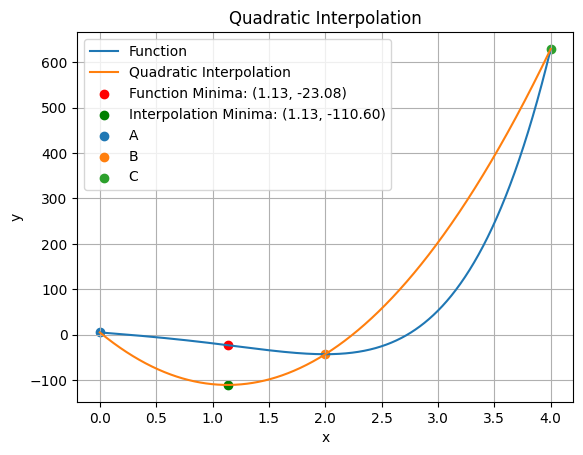

A = 1.1333333333333333, B = 2, C = 4
lambda s = 1.66
Convergance = 0.4990 , required = 0.0100


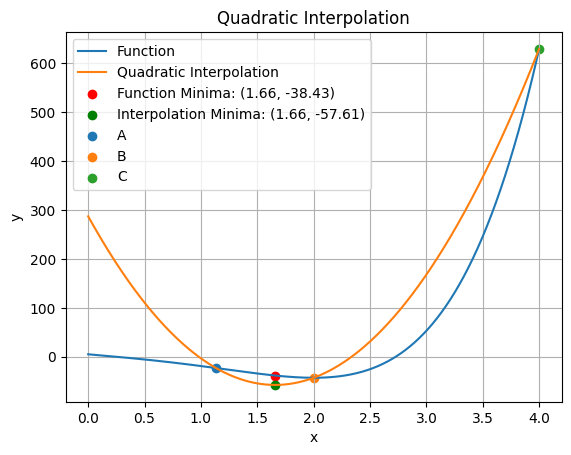

A = 1.658458102250572, B = 2, C = 4
lambda s = 1.87
Convergance = 0.0731 , required = 0.0100


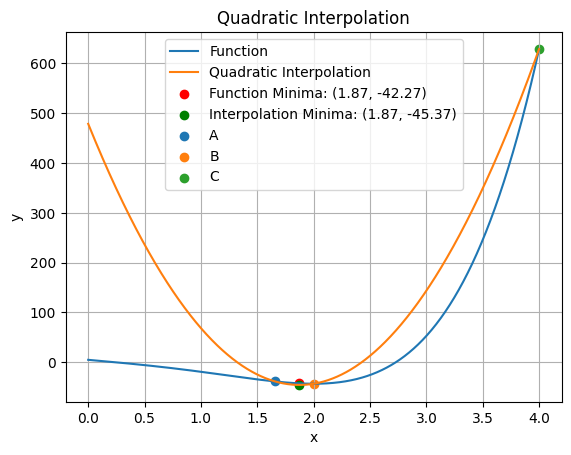

A = 1.8740625360908771, B = 2, C = 4
lambda s = 1.95
Convergance = 0.0099 , required = 0.0100


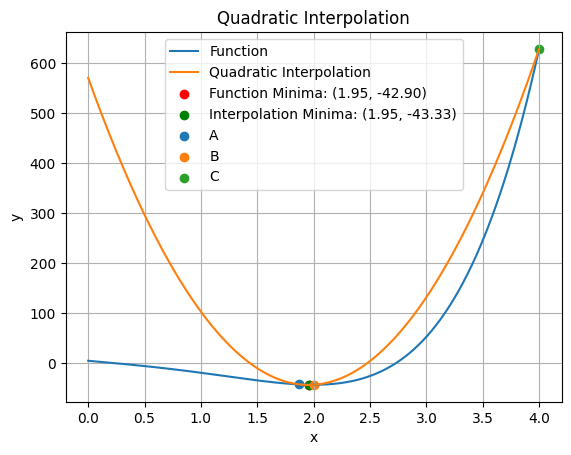

Solution = 1.9549510186208594


In [ ]:
f = lambda x: x**5 - 5 * x**3 - 20 * x + 5

lambda_s = solve_quadratic_interpolation(f, 2, accuracy=1e-2)
print(f"Solution = {lambda_s}")

In [ ]:
def solve_cubic_interpolation(
    objective_function: Callable[[float], float],
    derivative_function: Callable[[float], float],
    t_0: float,
    accuracy: float = 0.1,
    derivative_accuracy: float = 0.1,
    max_itr=10,
    visualize=True,
):
    """
    Solves an optimization problem using cubic interpolation.

    Parameters:
    - objective_function (Callable[[float], float]): The objective function to be minimized.
    - derivative_function (Callable[[float], float]): The derivative of the objective function.
    - t_0 (float): The initial interval.
    - accuracy (float, optional): The desired accuracy of the solution. Default is 0.1.
    - derivative_accuracy (float, optional): The desired accuracy of the derivative. Default is 0.1.
    - max_itr (int, optional): The maximum number of iterations. Default is 20.
    - visualize (bool, optional): If True, the optimization process is visualized. Default is True.

    Returns:
    - float: The optimal value of the parameter within the specified bounds.
    """
    A = 0
    fA = objective_function(A)
    fA_derivative = derivative_function(A)
    t = t_0
    while 1:
        B = t
        fB_derivative = derivative_function(B)
        if fB_derivative >= 0:
            fB = objective_function(B)

            break
        t *= 2

    for i in range(max_itr):
        # solving a , b , c ,d
        # a + b A + c A^2 + d A^3 = f_A
        # a + b B + c B^2 + d B^3 = f_B
        # 0 + b + 2cA + 3dA^2 = f_A_derivative
        # 0 + b + 2cB + 3dB^2 = f_B_derivative

        ans = np.linalg.solve(
            np.array(
                [
                    [1, A, A**2, A**3],
                    [1, B, B**2, B**3],
                    [0, 1, 2 * A, 3 * A**2],
                    [0, 1, 2 * B, 3 * B**2],
                ]
            ),
            np.array([fA, fB, fA_derivative, fB_derivative]),
        )
        a, b, c, d = ans
        lambda_1 = (-c + (c**2 - 3 * b * d) ** 0.5) / (3 * d)
        lambda_2 = (-c - (c**2 - 3 * b * d) ** 0.5) / (3 * d)
        if lambda_1 >= A and lambda_1 <= B:
            lambda_s = lambda_1
        else:
            lambda_s = lambda_2

        # print(lambda_1, lambda_2)
        # print(A, B  , lambda_s)
        h = lambda x: a + b * x + c * x**2 + d * x**3

        f = objective_function(lambda_s)

        # plot
        if visualize:
            x_values = np.linspace(0, 2 * t, 1000)
            y_values_1 = [objective_function(x) for x in x_values]
            y_values_2 = h(x_values)

            plt.figure()
            plt.plot(x_values, y_values_1, label="Function")
            plt.plot(x_values, y_values_2, label="cubic Interpolation")
            plt.scatter(
                lambda_s,
                f,
                color="red",
                label=f"Function Minima: ({lambda_s:.2f}, {f:.2f})",
            )
            plt.scatter(
                lambda_s,
                h(lambda_s),
                color="green",
                label=f"Interpolation Minima: ({lambda_s:.2f}, {h(lambda_s):.2f})",
            )
            plt.scatter(
                A,
                fA,
                label=f"A",
            )
            plt.scatter(B, fB, label=f"B")
            plt.title("cubic Interpolation")
            plt.xlabel("x")
            plt.ylabel("y")
            plt.grid()
            plt.legend()
            plt.show()

        # check convergence
        # print(np.abs((h(lambda_s) - f) / f), derivative_function(lambda_s))
        # print(f , h(lambda_s))
        if not (
            np.abs((h(lambda_s) - f) / f) < accuracy
            or abs(derivative_function(lambda_s)) < derivative_accuracy
        ):
            f_lambda_derivative = derivative_function(lambda_s)
            if f_lambda_derivative >= 0:
                B = lambda_s
            else:
                A = lambda_s
        else:
            break

    return lambda_s

## Testing

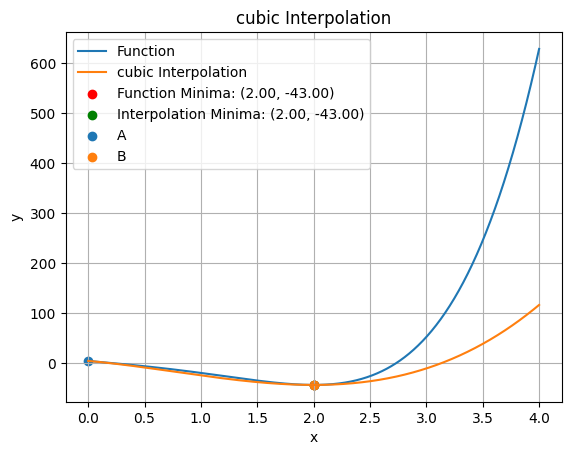

2.0


In [ ]:
f = lambda x: x**5 - 5 * x**3 - 20 * x + 5
f_derivative = lambda x: 5 * x**4 - 15 * x**2 - 20
lambda_s = solve_cubic_interpolation(
    f, f_derivative, 1, accuracy=1e-3, derivative_accuracy=0.1, visualize=True
)
print(lambda_s)

In [ ]:
def optimize_1d_general(
    obj_function: Callable[[np.ndarray], float],
    grad_function: Callable[[np.ndarray], np.ndarray],
    x: np.ndarray,
    s: np.ndarray,
    interval: float,
    method_1d: str = "golden",
):
    """
    Optimizes a one-dimensional objective function along a given search direction.

    Parameters:
    - obj_function (Callable[[np.ndarray], float]): The objective function to be minimized.
    - grad_function (Callable[[np.ndarray], np.ndarray]): The gradient function.
    - x (np.ndarray): The current point.
    - s (np.ndarray): The search direction.
    - interval (float): The interval for the one-dimensional optimization.
    - method_1d (str, optional): The method for one-dimensional optimization. Options include "constant", "fib" (Fibonacci), "golden" (Golden Section), "quad" (Quadratic), and "cubic" (Cubic). Default is "golden".

    Returns:
    - float: The optimal value of the parameter within the specified interval.
    """

    def function_to_optimize_lambda(lambda_s):
        x_new = x + lambda_s * s
        return obj_function(x_new)

    if method_1d == "constant":
        lambda_s = 1

    elif method_1d == "fib":
        lambda_s = solve_elimination_1D(
            function_to_optimize_lambda,
            0,
            interval,
            minimize=True,
            method="fib",
            accuracy=0.001,
            visualize=False,
        )

    elif method_1d == "golden":
        lambda_s = solve_elimination_1D(
            function_to_optimize_lambda,
            0,
            interval,
            minimize=True,
            method="golden",
            accuracy=0.001,
            visualize=False,
        )

    elif method_1d == "quad":
        lambda_s = solve_quadratic_interpolation(
            function_to_optimize_lambda,
            interval,
            accuracy=0.001,
            visualize=False,
        )

    elif method_1d == "cubic":

        def function_derivative(lambda_s):
            s_normalized = s / np.linalg.norm(s)
            return s_normalized @ grad_function(x + lambda_s * s)

        lambda_s = solve_cubic_interpolation(
            function_to_optimize_lambda,
            function_derivative,
            interval,
            accuracy=0.01,
            derivative_accuracy=0.01,
            visualize=False,
        )

    return lambda_s

# Descent functions

## Fletcher reeves

In [ ]:
def solve_fletcher_reeves(
    gradient_function: Callable[[np.ndarray], np.ndarray],
    hessian_function: Callable[[np.ndarray], np.ndarray],
    x_0: np.ndarray,
    eps: float = 1e-3,
):
    """
    Solves an optimization problem using the Fletcher-Reeves conjugate gradient method.

    Parameters:
    - gradient_function (Callable[[np.ndarray], np.ndarray]): The gradient function.
    - hessian_function (Callable[[np.ndarray], np.ndarray]): The Hessian function.
    - x_0 (np.ndarray): The initial guess for the minimum.
    - eps (float, optional): The desired accuracy of the solution. Default is 1e-3.

    Returns:
    - np.ndarray: The optimal values of the parameters.
    """

    x1 = x_0

    s1 = -gradient_function(x1)

    A = hessian_function(x1)


    lambda_s = np.linalg.norm(gradient_function(x1)) ** 2 / (s1 @ A @ s1)

    x2 = x1 + lambda_s * s1


    xi = x2

    grad_f_i_1 = -s1
    si_1 = s1


    i = 0

    while 1:
        grad_f_i = gradient_function(xi)


        if np.linalg.norm(grad_f_i) <= eps:
            break


        si = (
            -grad_f_i
            + np.linalg.norm(grad_f_i) ** 2 / np.linalg.norm(grad_f_i_1) ** 2 * si_1
        )

        lambda_si = np.linalg.norm(grad_f_i) ** 2 / (si @ A @ si)

        xi = xi + lambda_si * si

        A = hessian_function(xi)
        i += 1


    print(f"Finished in {i} iterations")


    return xi

## Marquardt algorithm

In [ ]:
def solve_marquardt(
    obj_function: Callable[[np.ndarray], float],
    gradient_func: Callable[[np.ndarray], np.ndarray],
    hessian_func: Callable[[np.ndarray], np.ndarray],
    x_0: np.ndarray,
    eps: float = 0.1,
    alpha: float = 1e4,
    c1: float = 0.5,
    c2: float = 2,
    method_1d: str = "constant",
):
    """
    Solves an optimization problem using the Marquardt method.

    Parameters:
    - obj_function (Callable[[np.ndarray], float]): The objective function to be minimized.
    - gradient_func (Callable[[np.ndarray], np.ndarray]): The gradient function.
    - hessian_func (Callable[[np.ndarray], np.ndarray]): The Hessian function.
    - x_0 (np.ndarray): The initial guess for the minimum.
    - eps (float, optional): The desired accuracy of the solution. Default is 0.1.
    - alpha (float, optional): The initial value for the Marquardt parameter. Default is 1e4.
    - c1 (float, optional): A constant for adjusting alpha when the function decreases. Default is 0.5.
    - c2 (float, optional): A constant for adjusting alpha when the function increases. Default is 2.
    - method_1d (str, optional): The method for one-dimensional optimization. Options include "constant", "fib" (Fibonacci), "golden" (Golden Section), "quad" (Quadratic), and "cubic" (Cubic). Default is "constant".

    Returns:
    - np.ndarray: The optimal values of the parameters.
    """
    x = x_0
    f = obj_function(x)
    i = 0
    while 1:
        grad = gradient_func(x)
        if np.linalg.norm(grad) <= eps:
            break
        hess = hessian_func(x)
        # print(grad)
        while 1:
            s = -np.linalg.inv(hess + alpha * np.identity(x.shape[0])) @ grad



            lambda_s = optimize_1d_general(
                obj_function,
                gradient_func,
                x,
                s,
                2, method_1d=method_1d
            )
            #print(lambda_s)
            x_new = x + lambda_s * s
            f_new = obj_function(x_new)
            if f_new < f:
                alpha = alpha * c1
                f = f_new
                x = x_new
                break
            else:
                alpha = alpha * c2

        i += 1

    print(f"Finished in {i} iterations")
    return x

## Quasi-Newton algorithm

In [ ]:
def solve_quasi_newton(
    obj_function: Callable[[np.ndarray], float],
    gradient_func: Callable[[np.ndarray], np.ndarray],
    x0: np.array,
    method_1d: str = "golden",
    eps: float = 1e-3,
):
    """
    Solves an optimization problem using the Quasi-Newton method.

    Parameters:
    - obj_function (Callable[[np.ndarray], float]): The objective function to be minimized.
    - gradient_func (Callable[[np.ndarray], np.ndarray]): The gradient function.
    - x0 (np.ndarray): The initial guess for the minimum.
    - method_1d (str, optional): The method for one-dimensional optimization. Options include "constant", "fib" (Fibonacci), "golden" (Golden Section), "quad" (Quadratic), and "cubic" (Cubic). Default is "golden".
    - eps (float, optional): The desired accuracy of the solution. Default is 1e-3.

    Returns:
    - np.ndarray: The optimal values of the parameters.
    """

    B = np.identity(x0.shape[0])

    x = x0

    grad = gradient_func(x)


    i = 0

    while 1:

        # if np.linalg.norm(grad) <= eps:

        #     break

        s = -B @ grad



        lambda_s = optimize_1d_general(obj_function,gradient_func ,x, s, 4, method_1d=method_1d)  # TODO : find a dynamic way to get the interval

        #print(lambda_s)

        x_new = x + lambda_s * s


        grad_new = gradient_func(x_new)

        if np.linalg.norm(grad_new) <= eps:

            break


        # must reshape cuz numpy is stupid when dealing with 1D arrays

        g = (grad_new - grad).reshape(-1, 1)

        d = (lambda_s * s).reshape(-1, 1)


        # EQ 6.136

        B_new = (

            B

            + (1 + (g.T @ B @ g) / (d.T @ g)) * (d @ d.T) / (d.T @ g)

            - (d @ g.T @ B) / (d.T @ g)

            - (B @ g @ d.T) / (d.T @ g)
        )


        B = B_new

        x = x_new
        grad = grad_new

        i += 1


    print(f"Finished in {i} iterations")

    return x

# Testing

## Rosenbrock’s parabolic valley function

Rosenbrock function:
\begin{align*}
    \text{rosenbrock_function}(x) &= 100 \cdot (x_2 - x_1^2)^2 + (1 - x_1)^2
\end{align*}

Gradient of Rosenbrock function:
\begin{align*}
    \nabla \text{rosenbrock_function}(x) &= \begin{bmatrix}
        -400x_1(x_2 - x_1^2) - 2(1 - x_1) \\
        200(x_2 - x_1^2)
    \end{bmatrix}
\end{align*}


Hessian of Rosenbrock function:
\begin{align*}
    \nabla^2 \text{rosenbrock_function}(x) &= \begin{bmatrix}
        -400(x_2 - 3x_1^2) + 2 & -400x_1 \\
        -400x_1 & 200
    \end{bmatrix}
\end{align*}

Initial guess:
\begin{align*}
    x_0 &= \begin{bmatrix}
        -1.2 \\
        1
    \end{bmatrix}
\end{align*}

In [ ]:
rosenbrock_function = lambda x: 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2
rosenbrock_function_gradient = lambda x: np.array(
    [
        -400 * x[0] * (x[1] - x[0] ** 2) - 2 * (1 - x[0]),
        200 * (x[1] - x[0] ** 2)
    ]
)
rosenbrock_function_hessian = lambda x: np.array([
    [-400 * (x[1] - 3 * x[0] ** 2) + 2, -400 * x[0]],
    [-400 * x[0]                      , 200]
]
)
x0 = np.array([-1.2, 1])

### Finding the the optimum using scipy

In [ ]:

# Define the Rosenbrock function
rosenbrock_function = lambda x: 100 * (x[1] - x[0] ** 2) ** 2 + (1 - x[0]) ** 2

# Initial guess
initial_guess = np.array([-1.2, 1])

# Use the minimize function to find the minimum
result = minimize(rosenbrock_function, initial_guess, method="BFGS")

# Print the result
print("Minimum value:", result.fun)
print("Optimal parameters:", result.x)
print("Number of iterations:", result.nit)

Minimum value: 2.0243313190213974e-11
Optimal parameters: [0.9999955  0.99999099]
Number of iterations: 32


In [ ]:
%%timeit -n 5 -r 5
with capture_output():  # suppress print statements
    minimize(rosenbrock_function, initial_guess, method="BFGS")

16.1 ms ± 1.21 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


### Finding the optimum using imlemented methods

#### Flethcer reeves

In [ ]:
x =solve_fletcher_reeves(
    rosenbrock_function_gradient,
    rosenbrock_function_hessian,
    x0,
    eps=1e-4,
)

value = rosenbrock_function(x)
print(f"Minimum of the function is at {x } with value {value  }")

Finished in 7544 iterations
Minimum of the function is at [0.99991057 0.99982093] with value 8.002046112392715e-09


In [ ]:
%%timeit -n 5 -r 5
with capture_output():  # suppress print statements
    solve_fletcher_reeves(
        rosenbrock_function_gradient,
        rosenbrock_function_hessian,
        x0,
        eps=1e-4,
    )


742 ms ± 227 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


#### marquardt

In [ ]:
x = solve_marquardt(
    rosenbrock_function,
    rosenbrock_function_gradient,
    rosenbrock_function_hessian,
    x0,
    eps=1e-4,
    method_1d="cubic",
)

value = rosenbrock_function(x)
print(f"Minimum of the function is at {x } with value {value  }")

Finished in 19 iterations
Minimum of the function is at [1.00000236 1.00000472] with value 5.581148314101601e-12


In [ ]:
%%timeit -n 5 -r 5
with capture_output():
    solve_marquardt(
    rosenbrock_function,
    rosenbrock_function_gradient,
    rosenbrock_function_hessian,
    x0,
    eps=1e-4,
    method_1d="cubic",
)

58.3 ms ± 21.1 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


#### quasi newton

In [ ]:
x = solve_quasi_newton(
    rosenbrock_function,
    rosenbrock_function_gradient,
    x0,
    method_1d="quad",
    eps=1e-3,
)

value = rosenbrock_function(x)
print(f"Minimum of the function is at {x} with value {value  }")

Finished in 22 iterations
Minimum of the function is at [0.99958922 0.99918236] with value 1.7014934872000645e-07


In [ ]:
%%timeit -n 5 -r 5
with capture_output():
    solve_quasi_newton(
    rosenbrock_function,
    rosenbrock_function_gradient,
    x0,
    method_1d="quad",
    eps=1e-3,
)

13.4 ms ± 3.59 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


### Results

| Method                       | Iterations | Runtime                 | x                                      | f(x)           |
|------------------------------|------------|-------------------------|----------------------------------------|----------------|
| **BFGS (Scipy)**              | 32         | 27.2 ms ± 4.96 ms       | [0.9999955, 0.99999099]                | 2.0243e-11     |
| **Fletcher Reeves**           | 17144      | 537 ms ± 9.28 ms        | [0.99988823, 0.99977603]               | 1.2512542e-08  |
| **Marquardt (Golden)**        | 24         | 14 ms ± 1.09 ms         | [0.99999999, 0.99999998]               | 1.5996e-16     |
| **Marquardt (Fibonacci)**     | 24         | 14.7 ms ± 4.09 ms       | [0.99999999, 0.99999999]               | 1.7353e-16     |
| **Marquardt (quadratic)**     | 21         | 12.1 ms ± 2.6 ms        | [0.99999959, 0.99999907]               | 1.297e-12      |
| **Marquardt (cubic)**         | 19         | 22.4 ms ± 5.36 ms       | [1.00000236, 1.00000472]               | 5.5811e-12     |
| **Quasi-Newton (Golden)**     | 526        | 247 ms ± 20.4 ms        | [0.99927916, 0.99855773]               | 5.1973e-07     |
| **Quasi-Newton (Quadratic)**  | 277        | 121 ms ± 33.8 ms        | [1.00015339, 1.00031638]               | 3.269e-08      |


## Powell's function

Powell function:
\begin{align*}
    \text{powell_function}(x) &= (x_1 + 10x_2)^2 + 5(x_3 - x_4)^2 + (x_2 - 2x_3)^4 + 10(x_1 - x_4)^4
\end{align*}
Gradient of Powell function:
\begin{align*}
    \nabla \text{powell_function}(x) &= \begin{bmatrix}
        2(x_1 + 10x_2) + 40(x_1 - x_4)^3 \\
        20(x_1 + 10x_2) + 4(x_2 - 2x_3)^3 \\
        10(x_3 - x_4) - 8(x_2 - 2x_3)^3 \\
        -10(x_3 - x_4) - 40(x_1 - x_4)^3
    \end{bmatrix}
\end{align*}

Hessian of Powell function:
\begin{align*}
    \nabla^2 \text{powell_function}(x) &= \begin{bmatrix}
        2 + 120(x_1 - x_4)^2 & 20 & 0 & -120(x_1 - x_4)^2 \\
        20 & 200 + 12(x_2 - 2x_3)^2 & -24(x_2 - 2x_3)^2 & 0 \\
        0 & -24(x_2 - 2x_3)^2 & 10 + 48(x_2 - 2x_3)^2 & -10 \\
        -120(x_1 - x_4)^2 & 0 & -10 & 10 + 120(x_1 - x_4)^2
    \end{bmatrix}
\end{align*}

Initial guess:
\begin{align*}
    x_0 &= \begin{bmatrix}
        3.0 \\
        -1.0 \\
        0.0 \\
        1.0
    \end{bmatrix}
\end{align*}

In [ ]:
powell_function = (
    lambda x: (x[0] + 10 * x[1]) ** 2
    + 5 * (x[2] - x[3]) ** 2
    + (x[1] - 2 * x[2]) ** 4
    + 10 * (x[0] - x[3]) ** 4
)

# Gradient of Powell function
gradient_powell_function = lambda x: np.array(
    [
        2 * (x[0] + 10 * x[1]) + 40 * (x[0] - x[3]) ** 3,
        20 * (x[0] + 10 * x[1]) + 4 * (x[1] - 2 * x[2]) ** 3,
        10 * (x[2] - x[3]) - 8 * (x[1] - 2 * x[2]) ** 3,
        -10 * (x[2] - x[3]) - 40 * (x[0] - x[3]) ** 3,
    ]
)

# Hessian of Powell function
hessian_powell_function = lambda x: np.array(
    [
        [2 + 120 * (x[0] - x[3]) ** 2, 20, 0, -120 * (x[0] - x[3]) ** 2],
        [20, 200 + 12 * (x[1] - 2 * x[2]) ** 2, -24 * (x[1] - 2 * x[2]) ** 2, 0],
        [0, -24 * (x[1] - 2 * x[2]) ** 2, 10 + 48 * (x[1] - 2 * x[2]) ** 2, -10],
        [-120 * (x[0] - x[3]) ** 2, 0, -10, 10 + 120 * (x[0] - x[3]) ** 2],
    ]
)

x0 =  np.array((3.0, - 1.0, 0.0, 1.0))

### Finding the optimum using scipy

In [ ]:
powell_function = (
    lambda x: (x[0] + 10 * x[1]) ** 2
    + 5 * (x[2] - x[3]) ** 2
    + (x[1] - 2 * x[2]) ** 4
    + 10 * (x[0] - x[3]) ** 4
)

initial_guess = np.array((3.0, -1.0, 0.0, 1.0))

result = minimize(powell_function, initial_guess, method="BFGS")

# Print the result
print("Minimum value:", result.fun)
print("Optimal parameters:", result.x)
print("Number of iterations:", result.nit)

Minimum value: 4.337526732036312e-09
Optimal parameters: [ 0.0058623  -0.00058624  0.00132846  0.00132817]
Number of iterations: 35


In [ ]:
%%timeit -n 5 -r 5
with capture_output():  # suppress print statements
    minimize(powell_function, initial_guess, method="BFGS")

32.6 ms ± 9.97 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


### Finding the optimum using implemented methods

#### Fletcher reeves

In [ ]:
x = solve_fletcher_reeves(
    gradient_powell_function,
    hessian_powell_function,
    x0,
    eps=1e-6,
)

value = powell_function(x)
print(f"Minimum of the function is at {x } with value {value  }")

Finished in 75145 iterations
Minimum of the function is at [ 0.00523049 -0.00052304  0.00260661  0.00260672] with value 1.5567035443612935e-09


In [ ]:
%%timeit -n 5 -r 5
with capture_output():
    solve_fletcher_reeves(
    gradient_powell_function,
    hessian_powell_function,
    x0,
    eps=1e-6,
)

3.63 s ± 249 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


#### marquardt

In [ ]:
x = solve_marquardt(
    powell_function,
    gradient_powell_function,
    hessian_powell_function,
    x0,
    eps=1e-6,
    method_1d="cubic",
)

value = powell_function(x)
print(f"Minimum of the function is at {x } with value {value  }")

Finished in 29 iterations
Minimum of the function is at [ 0.00144231 -0.00014423  0.00071879  0.00071879] with value 9.002591421872527e-12


In [ ]:
%%timeit -n 5 -r 5
with capture_output():
    solve_marquardt(
    powell_function,
    gradient_powell_function,
    hessian_powell_function,
    x0,
    eps=1e-6,
    method_1d="golden",
)

35.5 ms ± 3.13 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


#### quasi newton

In [ ]:
x = solve_quasi_newton(
    powell_function,
    gradient_powell_function,
    x0,
    method_1d="quad",
    eps=1e-6,
)

value = powell_function(x)
print(f"Minimum of the function is at {x } with value {value  }")

Finished in 14 iterations
Minimum of the function is at [ 5.81225540e-04 -5.80889936e-05  1.58060774e-04  1.58024521e-04] with value 4.595756718768112e-13


In [ ]:
%%timeit -n 5 -r 5
with capture_output():
    solve_quasi_newton(
    powell_function,
    gradient_powell_function,
    x0,
    method_1d="quad",
    eps=1e-6,
)

6.71 ms ± 1.65 ms per loop (mean ± std. dev. of 5 runs, 5 loops each)


### Results

| Method                     | Iterations | Runtime               | x                               | f(x)           |
|-----------------------------|------------|-----------------------|---------------------------------|----------------|
| **BFGS (Scipy)**            | 35         | 31.2 ms ± 9.07 ms     | [0.0058, -0.0006, 0.0013, 0.0013] | 4.337e-09      |
| **Fletcher Reeves**         | 335219     | 13.3 s ± 498 ms       | [0.0052, -0.0005, 0.0026, 0.0026] | 1.538e-09      |
| **Marquardt (Golden)**      | 34         | 26 ms ± 2.77 ms       | [0.0002, -0.0000, 0.0001, 0.0001] | 6.5377e-15     |
| **Marquardt (Quadratic)**   | 34         | 13.7 ms ± 1.53 ms     | [0.0002, -0.0000, 0.0001, 0.0001] | 6.5786e-15     |
| **Quasi-Newton (Golden)**   | 1953       | 700 ms ± 61.4 ms      | [0.0016, -0.0002, 0.0013, 0.0013] | 5.084e-11      |
| **Quasi-Newton (Fibonacci)** | 1580       | 569 ms ± 54.5 ms      | [0.0043, -0.0004, 0.0016, 0.0016] | 7.2483e-10     |
| **Quasi-Newton (Quadratic)** | 948       | 277 ms ± 40.5 ms      | [-0.0005, 0.0001, 0.0017, 0.0017] | 3.6659e-10     |
